In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [25]:
(X_train,y_train) , (X_test, y_test) = keras.datasets.cifar10.load_data()

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_test.shape

(10000, 32, 32, 3)

In [28]:
y_train[0]
y_train = y_train.reshape(-1, )

In [29]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
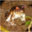

In [30]:
X_train[0]

In [31]:
classes = ["airplane", "automobile", "bird", "cat", "deer","dog","frog","horse", "ship", "truck"]
def plot_sample_image(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

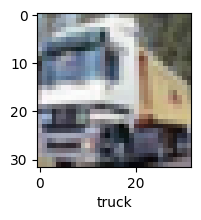

In [32]:
plot_sample_image(X_train, y_train, 1)

In [33]:
#  Normalizing our data
#  divide eachpxel value with 255 into 0-1 range

X_train = X_train /255
X_test = X_test / 255

In [36]:
#  Lets see how ANN works in this scenario
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train,y_train, epochs =5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 81ms/step - accuracy: 0.3052 - loss: 1.9324
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 81ms/step - accuracy: 0.4164 - loss: 1.6525
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 81ms/step - accuracy: 0.4531 - loss: 1.5575
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4717 - loss: 1.4958
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.4944 - loss: 1.4388


In [37]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4680 - loss: 1.4765


[1.478532314300537, 0.4691999852657318]

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classfication report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classfication report: 
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      1000
           1       0.56      0.66      0.61      1000
           2       0.44      0.14      0.21      1000
           3       0.39      0.24      0.30      1000
           4       0.28      0.70      0.40      1000
           5       0.45      0.33      0.38      1000
           6       0.61      0.35      0.44      1000
           7       0.45      0.63      0.53      1000
           8       0.66      0.57      0.61      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [41]:
cnn = keras.Sequential([
    #  cnn - it automatically makes
    layers.Conv2D(filters =32 ,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Another convolution and pooling

    layers.Conv2D(filters =64 ,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train,y_train, epochs =5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3916 - loss: 1.6810
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6000 - loss: 1.1402
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6577 - loss: 0.9766
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6914 - loss: 0.8874
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7171 - loss: 0.8094


In [43]:
cnn.evaluate(X_test, y_test)
y_test = y_test.reshape(-1,)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6503 - loss: 1.0045


In [44]:
y_cnn_predict= cnn.predict(X_test)
y_pred[:5]
y_classes= [np.argmax(el) for el in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [45]:
classes[y_classes[1]]
print('Classfication report: \n', classification_report(y_test, y_classes))

Classfication report: 
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      1000
           1       0.56      0.66      0.61      1000
           2       0.44      0.14      0.21      1000
           3       0.39      0.24      0.30      1000
           4       0.28      0.70      0.40      1000
           5       0.45      0.33      0.38      1000
           6       0.61      0.35      0.44      1000
           7       0.45      0.63      0.53      1000
           8       0.66      0.57      0.61      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000

